## Natural Language Processing: IT Department Support Ticket Classification System

### Context

In today's dynamic business landscape, organizations are increasingly recognizing the pivotal role customer feedback plays in shaping the trajectory of their products and services. The ability to swiftly and effectively respond to customer input not only fosters enhanced customer experiences but also serves as a catalyst for growth, prolonged customer engagement, and the nurturing of lifetime value relationships. As a dedicated Product Manager or Product Analyst, staying attuned to the voice of your customers is not just a best practice; it's a strategic imperative.

While your organization may be inundated with a wealth of customer-generated feedback and support tickets, your role entails much more than just processing these inputs. To make your efforts in managing customer experience and expectations truly impactful, you need a structured approach – a method that allows you to discern the most pressing issues, set priorities, and allocate resources judiciously. One of the most effective strategies at your disposal is to harness the power of Support Ticket Categorization.


### Objective

Develop an advanced support ticket categorization system that accurately classifies incoming support tickets, assigns relevant tags based on their content, implements timing mechanisms, and generates an initial draft response based on support ticket text sentiment for prioritizing tickets for prompt resolution.


### Tools Used

* **Large Language Models (LLMs)**
* **Transformers**
* **Prompt Engineering**
* **Exploratory Data Analysis**
* **Data Manipulation**
* **Business Analysis & Recommendations**

## **Installing and Importing Necessary Libraries and Dependencies**

In [1]:
# Downloading the model from the Hugging Face model hub

from huggingface_hub import hf_hub_download

# Importing the Llama class from the llama_cpp module

from llama_cpp import Llama

# Importing the json module

import json

# Importing libraries for loading and manipulating data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing for time computations

import time

## Loading the Data

In [2]:
# Read the .csv file using pandas

data = pd.read_csv("Support_Ticket_Text.csv")

## Data Overview

### Checking the First 5 Rows of the Data

In [3]:
# Print the first 5 rows of the dataset

data.head()

,support_tick_id,support_ticket_text
0,ST2023-006,My internet connection has significantly slowe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...
2,ST2023-008,I've accidentally deleted essential work docum...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...
4,ST2023-010,"My smartphone battery is draining rapidly, eve..."


### Checking the Shape of the Data

In [4]:
# Check the shape of the data

datashape = data.shape
print(datashape)

(21, 2)


#### Observations:

The dataset features **21 rows** and **2 columns**.

### Checking for Missing Values in the Data

In [5]:
# Check for missing values in the data

missing_values = data.isnull().sum()
print(missing_values)

support_tick_id        0
support_ticket_text    0
dtype: int64


#### Observations:

The dataset features no **missing values**.

## **Model Building**

### Loading the Model

In [6]:
# Define 'repo_id' and 'filename' for use with 'hf_hub_download'

repo_id = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
filename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [7]:
# Define model path for Hugging Face download function

model_path = hf_hub_download(
    repo_id,
    filename)

In [ ]:
# Initialize an instance of the 'Llama' class with the downloaded model and adjust the context window of responses 

llm = Llama(
    model_path=model_path,
    n_ctx=2048)

### Utility Functions

In [9]:
# Define a function to parse the JSON output from the model

def extract_json_data(json_str):
    try:
        # Find the indices of the opening and closing curly braces
        
        json_start = json_str.find('{')
        json_end = json_str.rfind('}')

        if json_start != -1 and json_end != -1:
            extracted_category = json_str[json_start:json_end + 1]  # Extract the JSON object
            data_dict = json.loads(extracted_category)
            return data_dict
        else:
            print(f"Warning: JSON object not found in response: {json_str}")
            return {}
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON: {e}")
        return {}

## **Task 1: Ticket Categorization and Returning Structured Output**

In [10]:
# Create a copy of the dataset

data_1 = data.copy()

In [11]:
# Define the response function for support ticket categorization and output structuring

def response_1(prompt, ticket):
    model_output = llm(
        f"""
        Q: {prompt}
        R: {ticket}
        """,
        max_tokens=200,
        stop=["none"],
        temperature=0.2,
        echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    
    # Check if '{' is in temp_output
    if '{' in temp_output:
        final_output = temp_output[temp_output.index('{'):]
    else:
        # Handle the case where '{' is not found
        final_output = "{"  # or provide a suitable default value or structure

    return final_output

In [12]:
# Define prompt for ticket categorization including JSON output formatting and examples

prompt_1 = """
You are a support ticket classification system. Your task is to read the dataset "data_1" and focus on the 'support_ticket_text' cells. 
For each support ticket, provide the following details:

1. **Category**: Determine the type of issue from these options: "Hardware", "Software", or "Network". Assign the most appropriate category from the 3 options to each support ticket.

Do not output anything other than the category for each support ticket.

Please format the output as a JSON object like this (without any extra commas or characters):

{
  "Category": "<category>"
}

Here are some examples:

Support ticket: "My laptop has struggled to run the latest version of Microsoft Excel."
{
  "Category": "Software"
}

Support ticket: "My internet connection has significantly slowed down."
{
  "Category": "Network"
}

Support ticket: "Urgent help required! My laptop refuses to start."
{
  "Category": "Hardware"
}

Do not forget to include the final curly bracket "}" for every JSON object output. Now, process the following support ticket:

Support ticket: {ticket}
"""

In [ ]:
# Apply the response_1 function to each support ticket text in the DataFrame and store the model's response in a new column 'model_response'

start = time.time()
data_1['model_response'] = data_1['support_ticket_text'].apply(lambda x: response_1(prompt_1, x))
end = time.time()

In [14]:
# Display total time taken for model to complete the task

print("Time Taken:",(end-start), "seconds")

Time Taken: 85.69428610801697 seconds


In [15]:
# Check the first five rows of the data to confirm whether the model_response column has been added

data_1.head()

,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Network""\n }"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware""\n }"
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Software""\n }"
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Network""\n }"
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware""\n }"


In [16]:
# Print support ticket text based on value 'i' for location of ticket within rows of dataset

i = 2
print(data_1.loc[i, 'support_ticket_text'])

I've accidentally deleted essential work documents, causing substantial data loss. I understand the need to avoid further actions on my device. Can you please prioritize the data recovery process and guide me through it?


In [17]:
# Print model response for corresponding support ticket at value 'i'

print(data_1.loc[i, 'model_response'])

{
          "Category": "Software"
        }


#### Observations:

Model response displays a correct classification of the support ticket category.

In [18]:
# Apply 'extract_json_data' function to 'model_response' column and print first 5 rows to ensure new column 'model_response_parsed' is formatted correctly 

data_1['model_response_parsed'] = data_1['model_response'].apply(extract_json_data)
data_1['model_response_parsed'].head()

0     {'Category': 'Network'}
1    {'Category': 'Hardware'}
2    {'Category': 'Software'}
3     {'Category': 'Network'}
4    {'Category': 'Hardware'}
Name: model_response_parsed, dtype: object

In [19]:
# Display value counts for unique category values in 'model_response_parsed' column

data_1['model_response_parsed'].value_counts()

model_response_parsed
{'Category': 'Hardware'}    12
{'Category': 'Network'}      5
{'Category': 'Software'}     4
Name: count, dtype: int64

#### Observations:

Model response indicates **12 tickets with hardware issues**, **5 tickets with network issues**, and **4 tickets with software issues**.

In [20]:
# Normalize the 'model_response_parsed' column using the 'json_normalize' function in pandas and print first 5 rows to ensure correct formatting

model_response_parsed_df_1 = pd.json_normalize(data_1['model_response_parsed'])
model_response_parsed_df_1.head()

,Category
0,Network
1,Hardware
2,Software
3,Network
4,Hardware


In [21]:
# Concatinating 'data_1' and 'model_response_parsed_df_1' and printing the first 5 rows of the concatonated dataset

data_with_parsed_model_output_1 = pd.concat([data_1, model_response_parsed_df_1], axis=1)
data_with_parsed_model_output_1.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Category
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Network""\n }",{'Category': 'Network'},Network
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware""\n }",{'Category': 'Hardware'},Hardware
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Software""\n }",{'Category': 'Software'},Software
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Network""\n }",{'Category': 'Network'},Network
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware""\n }",{'Category': 'Hardware'},Hardware


In [22]:
# Dropping 'model_response' and 'model_response_parsed' columns and printing the first 5 rows of the resulting dataset

final_data_1 = data_with_parsed_model_output_1.drop(['model_response','model_response_parsed'], axis=1)
final_data_1.head()

,support_tick_id,support_ticket_text,Category
0,ST2023-006,My internet connection has significantly slowe...,Network
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware
2,ST2023-008,I've accidentally deleted essential work docum...,Software
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware


In [23]:
# Print 'final_data_1' dataset

final_data_1

,support_tick_id,support_ticket_text,Category
0,ST2023-006,My internet connection has significantly slowe...,Network
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware
2,ST2023-008,I've accidentally deleted essential work docum...,Software
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware
5,ST2023-011,I'm locked out of my online banking account an...,Software
6,ST2023-012,"My computer's performance is sluggish, severel...",Software
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware
8,ST2023-014,My external hard drive isn't being recognized ...,Hardware
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware


#### Observations:

Model categorization appears uniform and case-correct.

## **Task 2: Creating Tags**

In [24]:
# Create a second copy of the data

data_2 = data.copy()

In [25]:
# Define the response function for creating tags for each support ticket iterating upon the function 'response_1'

def response_2(prompt, ticket):
    model_output = llm(
      f"""
      Q: {prompt}
      R: {ticket}
      """,
      max_tokens=200,
      stop=["none"],
      temperature=0.2,
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [26]:
# Define prompt for ticket categorization adding additional instructions regarding tag creation for each support ticket

prompt_2 = """
You are a support ticket classification system. Your task is to read the dataset "data_2" and focus on the 'support_ticket_text' cells. 
For each support ticket, provide the following details:

1. **Category**: Determine the type of issue from these options: "Hardware", "Software", or "Network". Assign the most appropriate category from the 3 options to each support ticket. Do not create a subcategory field.
2. **Tags**: Extract relevant terms from the support ticket text and assign the single most important term as a tag for each support ticket.

Do not output anything other than the category and tags for each support ticket.

Please format the output as a JSON object like this (without any extra commas or characters):

{
  "Category": "<category>",
  "Tags": "<tags>"
}

Here are some examples:

Support ticket: "My laptop has struggled to run the latest version of Microsoft Excel."
{
  "Category": "Software",
  "Tags": "Excel"
}

Support ticket: "My internet connection has significantly slowed down."
{
  "Category": "Network",
  "Tags": "Internet"
}

Support ticket: "Urgent help required! My laptop refuses to start."
{
  "Category": "Hardware",
  "Tags": "Laptop"
}

Do not forget to include the final curly bracket "}" for every JSON object output. Now, process the following support ticket:

Support ticket: {ticket}
"""

In [ ]:
# Apply the response_2 function to each support ticket text in the DataFrame and store the model's response in a new column 'model_response'

start = time.time()
data_2['model_response'] = data_2['support_ticket_text'].apply(lambda x: response_2(prompt_2, x))
end = time.time()

In [28]:
# Display total time taken for model to complete the task

print("Time Taken:",(end-start), "seconds")

Time Taken: 94.84734606742859 seconds


In [29]:
# Check the first five rows of 'data_2' to confirm whether the new column has been added

data_2.head()

,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Network"",\n ""Ta..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware"",\n ""T..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Software"",\n ""T..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Network"",\n ""Ta..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware"",\n ""T..."


In [30]:
# Print support ticket text based on value 'i' for location of ticket within rows of 'data_2'

i = 1
print(data_2.loc[i, 'support_ticket_text'])

Urgent help required! My laptop refuses to start, and I have a crucial presentation scheduled for tomorrow. I've attempted a restart, but it hasn't worked. Please provide immediate assistance to resolve this hardware issue


In [31]:
# Print model response for corresponding support ticket at value 'i'

print(data_2.loc[i, 'model_response'])

{
        "Category": "Hardware",
        "Tags": "Laptop"
      }


#### Observations:

Model category classification is correct and tag includes relevant terms from support ticket text.

In [32]:
# Apply 'extract_json_data' function to 'model_response' column and print first 5 rows to ensure new column 'model_response_parsed' is formatted correctly

data_2['model_response_parsed'] = data_2['model_response'].apply(extract_json_data)
data_2['model_response_parsed'].head()

0    {'Category': 'Network', 'Tags': 'Internet, Con...
1           {'Category': 'Hardware', 'Tags': 'Laptop'}
2        {'Category': 'Software', 'Tags': 'Data_loss'}
3             {'Category': 'Network', 'Tags': 'Wi-Fi'}
4          {'Category': 'Hardware', 'Tags': 'Battery'}
Name: model_response_parsed, dtype: object

In [33]:
# Normalizing the 'model_response_parsed_df_2' column using the 'json_normalize' function in pandas

model_response_parsed_df_2 = pd.json_normalize(data_2['model_response_parsed'])
model_response_parsed_df_2.head()

,Category,Tags
0,Network,"Internet, Connectivity"
1,Hardware,Laptop
2,Software,Data_loss
3,Network,Wi-Fi
4,Hardware,Battery


In [34]:
# Concatinating 'data_2' and 'model_response_parsed_df_2' and printing the first 5 rows of the concatonated dataset

data_with_parsed_model_output_2 = pd.concat([data_2, model_response_parsed_df_2], axis=1)
data_with_parsed_model_output_2.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Category,Tags
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Network"",\n ""Ta...","{'Category': 'Network', 'Tags': 'Internet, Con...",Network,"Internet, Connectivity"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware"",\n ""T...","{'Category': 'Hardware', 'Tags': 'Laptop'}",Hardware,Laptop
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Software"",\n ""T...","{'Category': 'Software', 'Tags': 'Data_loss'}",Software,Data_loss
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Network"",\n ""Ta...","{'Category': 'Network', 'Tags': 'Wi-Fi'}",Network,Wi-Fi
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware"",\n ""T...","{'Category': 'Hardware', 'Tags': 'Battery'}",Hardware,Battery


In [35]:
# Dropping 'model_response' and 'model_response_parsed' columns

final_data_2 = data_with_parsed_model_output_2.drop(['model_response','model_response_parsed'], axis=1)
final_data_2.head()

,support_tick_id,support_ticket_text,Category,Tags
0,ST2023-006,My internet connection has significantly slowe...,Network,"Internet, Connectivity"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,Laptop
2,ST2023-008,I've accidentally deleted essential work docum...,Software,Data_loss
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network,Wi-Fi
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware,Battery


In [36]:
# Print 'final_data_2' dataset

final_data_2

,support_tick_id,support_ticket_text,Category,Tags
0,ST2023-006,My internet connection has significantly slowe...,Network,"Internet, Connectivity"
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,Laptop
2,ST2023-008,I've accidentally deleted essential work docum...,Software,Data_loss
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network,Wi-Fi
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware,Battery
5,ST2023-011,I'm locked out of my online banking account an...,Software,"Online Banking, Password"
6,ST2023-012,"My computer's performance is sluggish, severel...",Software,Performance
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware,Blue Screen
8,ST2023-014,My external hard drive isn't being recognized ...,Hardware,External_hard_drive
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware,Graphics_card


#### Observations:

Model categorization and tags appear correct.

## **Task 3: Assigning Priority and ETA**

In [37]:
# Create a third copy of the data

data_3 = data.copy()

In [38]:
# Define the response function for assigning priority levels and ETAs for each support ticket iterating upon the function 'response_2'

def response_3(prompt,ticket):
    model_output = llm(
      f"""
      Q: {prompt}
      R: {ticket}
      """,
      max_tokens=200,
      stop=["None"],
      temperature=0.2,
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [39]:
# Define prompt for ticket categorization adding additional instructions regarding tag creation and timeline estimation for each support ticket

prompt_3 = """
You are a support ticket classification system. Your task is to read the dataset "data_3" and focus on the 'support_ticket_text' cells. 
For each support ticket, provide the following details:

1. **Category**: Determine the type of issue from these options: "Hardware", "Software", or "Network". Assign the most appropriate category from the 3 options to each support ticket. Do not create a subcategory field.
2. **Tags**: Extract relevant terms from the support ticket text and assign the single most important term as a tag for each support ticket.
3. **Priority**: Rate the level of priority based on urgency from these 3 options: "Low", "Medium", or "High".
4. **ETA**: Assign an estimated time for resolution from these 3 options: "2-3 Business Days", "24 Hours", or "Immediate".

Please format the output as a JSON object like this:

{
  "Category": "<category>",
  "Tags": "<tags>",
  "Priority": "<priority>",
  "ETA": "<eta>"
}

Here are some examples:

Support ticket: "My laptop has struggled to run the latest version of Microsoft Excel."
{
  "Category": "Software",
  "Tags": "Excel"
  "Priority": "Low",
  "ETA": "2-3 Business Days"
}

Support ticket: "My internet connection has significantly slowed down."
{
  "Category": "Network",
  "Tags": "Internet",
  "Priority": "Medium",
  "ETA": "24 Hours"
}

Support ticket: "Urgent help required! My laptop refuses to start."
{
  "Category": "Hardware",
  "Tags": "Laptop",
  "Priority": "High",
  "ETA": "Immediate"
}

Do not forget to include the final curly bracket "}" for every JSON object output. Now, process the following support ticket:

Support ticket: {ticket}
"""

In [ ]:
# Apply the response_3 function to each support ticket text in the DataFrame and store the model's response in a new column 'model_response'

start = time.time()
data_3['model_response'] = data_3['support_ticket_text'].apply(lambda x: response_3(prompt_3, x))
end = time.time()

In [41]:
# Display total time taken for model to complete the task

print("Time Taken:",(end-start), "seconds")

Time Taken: 123.09486317634583 seconds


In [42]:
# Check the first five rows of 'data_3' to confirm whether the new column has been added

data_3.head()

,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Network"",\n ""Ta..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware"",\n ""T..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Software"",\n ""T..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Network"",\n ""Ta..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware"",\n ""T..."


In [43]:
# Print support ticket text based on value 'i' for location of ticket within rows of 'data_3'

i = 3
print(data_3.loc[i, 'support_ticket_text'])

Despite being in close proximity to my Wi-Fi router, the signal remains persistently weak in my home. This issue has been ongoing, and I need assistance troubleshooting it. Please help me resolve the weak Wi-Fi signal problem.


In [44]:
# Print model response for corresponding support ticket at value 'i'

print(data_3.loc[i, 'model_response'])

{
        "Category": "Network",
        "Tags": "Wi-Fi",
        "Priority": "Medium",
        "ETA": "24 Hours"
      }


#### Observations:

Model category classification is correct, the tag is relevant, the priority is correct, and the ETA appears reasonable.

In [45]:
# Apply 'extract_json_data' function to 'model_response' column and print first 5 rows to ensure new column 'model_response_parsed' is formatted correctly

data_3['model_response_parsed'] = data_3['model_response'].apply(extract_json_data)
data_3['model_response_parsed'].head()

0    {'Category': 'Network', 'Tags': 'Internet, Con...
1    {'Category': 'Hardware', 'Tags': 'Laptop', 'Pr...
2    {'Category': 'Software', 'Tags': 'Data Loss', ...
3    {'Category': 'Network', 'Tags': 'Wi-Fi', 'Prio...
4    {'Category': 'Hardware', 'Tags': 'Smartphone, ...
Name: model_response_parsed, dtype: object

In [46]:
# Normalizing the 'model_response_parsed_df_3' column using the 'json_normalize' function in pandas

model_response_parsed_df_3 = pd.json_normalize(data_3['model_response_parsed'])
model_response_parsed_df_3.head()

,Category,Tags,Priority,ETA
0,Network,"Internet, Connectivity",High,Immediate
1,Hardware,Laptop,High,Immediate
2,Software,Data Loss,High,Immediate
3,Network,Wi-Fi,Medium,24 Hours
4,Hardware,"Smartphone, Battery",Medium,24 Hours


In [47]:
# Concatinating 'data_3' and 'model_response_parsed_df_3' and printing the first 5 rows of the concatonated dataset

data_with_parsed_model_output_3 = pd.concat([data_3, model_response_parsed_df_3], axis=1)
data_with_parsed_model_output_3.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Network"",\n ""Ta...","{'Category': 'Network', 'Tags': 'Internet, Con...",Network,"Internet, Connectivity",High,Immediate
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware"",\n ""T...","{'Category': 'Hardware', 'Tags': 'Laptop', 'Pr...",Hardware,Laptop,High,Immediate
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Software"",\n ""T...","{'Category': 'Software', 'Tags': 'Data Loss', ...",Software,Data Loss,High,Immediate
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Network"",\n ""Ta...","{'Category': 'Network', 'Tags': 'Wi-Fi', 'Prio...",Network,Wi-Fi,Medium,24 Hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware"",\n ""T...","{'Category': 'Hardware', 'Tags': 'Smartphone, ...",Hardware,"Smartphone, Battery",Medium,24 Hours


In [48]:
# Dropping 'model_response' and 'model_response_parsed' columns

final_data_3 = data_with_parsed_model_output_3.drop(['model_response','model_response_parsed'], axis=1)
final_data_3.head()

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,Network,"Internet, Connectivity",High,Immediate
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,Laptop,High,Immediate
2,ST2023-008,I've accidentally deleted essential work docum...,Software,Data Loss,High,Immediate
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network,Wi-Fi,Medium,24 Hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware,"Smartphone, Battery",Medium,24 Hours


In [49]:
# Print 'final_data_3' dataset

final_data_3

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA
0,ST2023-006,My internet connection has significantly slowe...,Network,"Internet, Connectivity",High,Immediate
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,Laptop,High,Immediate
2,ST2023-008,I've accidentally deleted essential work docum...,Software,Data Loss,High,Immediate
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network,Wi-Fi,Medium,24 Hours
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware,"Smartphone, Battery",Medium,24 Hours
5,ST2023-011,I'm locked out of my online banking account an...,Software,"Online Banking, Password Reset",High,Immediate
6,ST2023-012,"My computer's performance is sluggish, severel...",Software,Performance,High,24 Hours
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware,Blue Screen Error,High,Immediate
8,ST2023-014,My external hard drive isn't being recognized ...,Hardware,External Hard Drive,High,Immediate
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware,Graphics Card,Medium,24 Hours


#### Observations:

Model categorization, tags, priority, and ETA fields appear accurate and correctly-formatted.

## **Task 4 - Creating a Draft Response**

In [98]:
# Create a fourth copy of the dataset

data_4 = data.copy()

In [99]:
# Define the response function for creating draft responses for each support ticket iterating upon the function 'response_3' and increasing token limits

def response_4(prompt,ticket):
    model_output = llm(
      f"""
      Q: {prompt}
      A: {ticket}
      """,
      max_tokens=400,
      stop=["None"],
      temperature=0.2,
      echo=False,
    )

    temp_output = model_output["choices"][0]["text"]
    final_output = temp_output[temp_output.index('{'):]

    return final_output

In [100]:
prompt_4 = """
You are a support ticket classification system. Your task is to read the dataset "data_4" and focus on the 'support_ticket_text' cells. For each support ticket, provide the following details:

1. **Category**: Determine the type of issue from these options: "Hardware," "Software," or "Network." Assign the most appropriate category to each support ticket.
2. **Tags**: Extract relevant terms from the support ticket text and assign the single most important term as a tag for each support ticket.
3. **Priority**: Rate the level of priority based on urgency from these 3 options: "Low", "Medium", or "High".
4. **ETA**: Assign an estimated time for resolution from these 3 options: "2-3 Business Days," "24 Hours," or "Immediate."
5. **Response**: Provide a precise response explaining how the issue in the support ticket text can be resolved. Ensure that the response is a valid JSON string, escaping any necessary characters.

Do not output anything other than the category, tags, priority, ETA, and response for each support ticket.

Please format the output as a JSON object like this (without any extra commas or characters):

{
  "Category": "<category>",
  "Tags": "<tags>",
  "Priority": "<priority>",
  "ETA": "<eta>",
  "Response": "<response>"
}

Ensure that the JSON object is complete and correctly formatted with a single final curly bracket "}" at the end. The number of words in the response should be less than 48.

Here are some examples:

Support ticket: "My laptop has struggled to run the latest version of Microsoft Excel."
{
  "Category": "Software",
  "Tags": "Excel",
  "Priority": "Low",
  "ETA": "2-3 Business Days",
  "Response": "Please restart your laptop and install the latest updates for Microsoft Excel. If the problem persists, contact our support team for further assistance."
}

Support ticket: "My internet connection has significantly slowed down."
{
  "Category": "Network",
  "Tags": "Internet",
  "Priority": "Medium",
  "ETA": "24 Hours",
  "Response": "Please restart your router. If the problem persists, contact our support team for further assistance."
}

Support ticket: "Urgent help required! My laptop refuses to start."
{
  "Category": "Hardware",
  "Tags": "Laptop",
  "Priority": "High",
  "ETA": "Immediate",
  "Response": "Please check if the power cable is connected properly. If the laptop still does not start, please visit our service center immediately."
}

Support ticket: "I am experiencing intermittent internet disconnections."
{
  "Category": "Network",
  "Tags": "Internet, Disconnections",
  "Priority": "High",
  "ETA": "Immediate",
  "Response": "We apologize for the inconvenience you're experiencing with your internet connection. We recommend checking the following:\\n1. Ensure all cables are securely connected to the modem and router.\\n2. Restart both the modem and router.\\n3. Check if there are any ongoing network maintenance or outages in your area.\\n4. If the problem persists, please contact our support team for further assistance."
}

Now, process the following support ticket:

Support ticket: {ticket}
"""

In [ ]:
# Apply the response_4 function to each support ticket text in the DataFrame and store the model's response in a new column 'model_response'

start = time.time()
data_4['model_response'] = data_4['support_ticket_text'].apply(lambda x: response_4(prompt_4, x))
end = time.time()

In [102]:
# Display total time taken for model to complete the task

print("Time Taken:",(end-start), "seconds")

Time Taken: 262.94117307662964 seconds


In [103]:
# Check the first five rows of the 'data_4' to confirm whether the new column has been added

data_4.head()

,support_tick_id,support_ticket_text,model_response
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Network"",\n ""Ta..."
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware"",\n ""T..."
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Software"",\n ""T..."
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Network"",\n ""Ta..."
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware"",\n ""T..."


In [104]:
# Print support ticket text based on value 'i' for location of ticket within rows of 'data_4'

i = 20
print(data_4.loc[i, 'support_ticket_text'])

I hope this message finds you well. I am writing to report a perplexing issue I've encountered with my work computer in recent days. 
The problem seems to involve a combination of unusual software behavior and unexpected data loss.
Over the past week, I've observed that certain software applications on my computer have been 
behaving erratically. For example, some applications freeze randomly, while others exhibit unexplained crashes. Additionally, 
I've noticed that some files and documents that were previously saved on my desktop have mysteriously 
disappeared. These issues are causing significant disruptions to my daily tasks and workflow.
While I don't have specific instructions on how to resolve this complex problem,
I suspect there may be an underlying issue with the system or software compatibility. 
I kindly request your expertise and assistance in thoroughly diagnosing this intricate problem. 
Your insights and guidance would be greatly appreciated. If you require any addition

In [105]:
# Print model response for corresponding support ticket at value 'i'

print(data_4.loc[i, 'model_response'])

{
  "Category": "Software",
  "Tags": ["Software", "Applications", "Data loss"],
  "Priority": "High",
  "ETA": "24 Hours",
  "Response": "We apologize for the inconvenience you're experiencing with your software applications and data loss. To help diagnose the issue, we recommend performing the following steps:\n1. Run a full system scan using an antivirus program to check for any potential malware or viruses.\n2. Check for any recent software updates that may address the observed issues. Install these updates if available.\n3. Perform a clean boot of your computer to isolate any third-party applications that might be causing conflicts.\n4. If the problem persists, please provide us with more details about the affected applications and the specific error messages you encounter. Additionally, please share any relevant system information such as operating system version, installed software, and hardware configuration."
}


#### Observations:

Model category classification is correct, the tag is relevant, the priority is correct, and the ETA appears reasonable. Model's response is appropriate and comprehensive.

In [106]:
# Apply 'extract_json_data' function to 'model_response' column and print all rows to ensure new column 'model_response_parsed' is formatted correctly

data_4['model_response_parsed'] = data_4['model_response'].apply(extract_json_data)
data_4['model_response_parsed']

0     {'Category': 'Network', 'Tags': 'Internet, Dis...
1     {'Category': 'Hardware', 'Tags': 'Laptop', 'Pr...
2     {'Category': 'Software', 'Tags': 'Data Loss, R...
3     {'Category': 'Network', 'Tags': 'Wi-Fi, Signal...
4     {'Category': 'Hardware', 'Tags': 'Smartphone, ...
5     {'Category': 'Software', 'Tags': 'Online Banki...
6     {'Category': 'Software', 'Tags': 'Performance,...
7     {'Category': 'Hardware', 'Tags': 'Blue Screen ...
8     {'Category': 'Hardware', 'Tags': 'External Har...
9     {'Category': 'Hardware', 'Tags': 'Graphics Car...
10    {'Category': 'Hardware', 'Tags': 'Data Recover...
11    {'Category': 'Hardware', 'Tags': 'Computer, Sc...
12    {'Category': 'Hardware', 'Tags': 'Laptop, Wate...
13    {'Category': 'Hardware', 'Tags': 'USB, Damage'...
14    {'Category': 'Hardware', 'Tags': 'Touchpad, La...
15    {'Category': 'Network', 'Tags': 'Internet, Dro...
16    {'Category': 'Network', 'Tags': 'Wi-Fi, Incons...
17    {'Category': 'Hardware', 'Tags': 'Data Rec

In [107]:
# Normalizing the 'model_response_parsed_df_3' column using the 'json_normalize' function in pandas

model_response_parsed_df_4 = pd.json_normalize(data_4['model_response_parsed'])
model_response_parsed_df_4.head()

,Category,Tags,Priority,ETA,Response
0,Network,"Internet, Disconnections",High,Immediate,We apologize for the inconvenience you're expe...
1,Hardware,Laptop,High,Immediate,We understand the urgency of your situation an...
2,Software,"Data Loss, Recovery",High,2-3 Business Days,We're sorry for the data loss you've experienc...
3,Network,"Wi-Fi, Signal",Medium,24 Hours,We apologize for the inconvenience you're expe...
4,Hardware,"Smartphone, Battery",Medium,2-3 Business Days,We recommend checking the following:\n1. Ensur...


In [108]:
# Concatinating 'data_4' and 'model_response_parsed_df_4' and printing the first 5 rows of the concatonated dataset

data_with_parsed_model_output_4 = pd.concat([data_4, model_response_parsed_df_4], axis=1)
data_with_parsed_model_output_4.head()

,support_tick_id,support_ticket_text,model_response,model_response_parsed,Category,Tags,Priority,ETA,Response
0,ST2023-006,My internet connection has significantly slowe...,"{\n ""Category"": ""Network"",\n ""Ta...","{'Category': 'Network', 'Tags': 'Internet, Dis...",Network,"Internet, Disconnections",High,Immediate,We apologize for the inconvenience you're expe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,"{\n ""Category"": ""Hardware"",\n ""T...","{'Category': 'Hardware', 'Tags': 'Laptop', 'Pr...",Hardware,Laptop,High,Immediate,We understand the urgency of your situation an...
2,ST2023-008,I've accidentally deleted essential work docum...,"{\n ""Category"": ""Software"",\n ""T...","{'Category': 'Software', 'Tags': 'Data Loss, R...",Software,"Data Loss, Recovery",High,2-3 Business Days,We're sorry for the data loss you've experienc...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,"{\n ""Category"": ""Network"",\n ""Ta...","{'Category': 'Network', 'Tags': 'Wi-Fi, Signal...",Network,"Wi-Fi, Signal",Medium,24 Hours,We apologize for the inconvenience you're expe...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...","{\n ""Category"": ""Hardware"",\n ""T...","{'Category': 'Hardware', 'Tags': 'Smartphone, ...",Hardware,"Smartphone, Battery",Medium,2-3 Business Days,We recommend checking the following:\n1. Ensur...


In [109]:
# Dropping 'model_response' and 'model_response_parsed' columns

final_data_4 = data_with_parsed_model_output_4.drop(['model_response','model_response_parsed'], axis=1)
final_data_4.head()

,support_tick_id,support_ticket_text,Category,Tags,Priority,ETA,Response
0,ST2023-006,My internet connection has significantly slowe...,Network,"Internet, Disconnections",High,Immediate,We apologize for the inconvenience you're expe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,Laptop,High,Immediate,We understand the urgency of your situation an...
2,ST2023-008,I've accidentally deleted essential work docum...,Software,"Data Loss, Recovery",High,2-3 Business Days,We're sorry for the data loss you've experienc...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network,"Wi-Fi, Signal",Medium,24 Hours,We apologize for the inconvenience you're expe...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware,"Smartphone, Battery",Medium,2-3 Business Days,We recommend checking the following:\n1. Ensur...


In [110]:
# Rename column names for enhanced readability

final_data_4.rename(columns={"Response":"IT Response Message", "support_tick_id":"Support Ticket ID", "support_ticket_text":"Support Ticket Text"},inplace=True)

In [111]:
# Print full Support Ticket Classification dataset

final_data_4

,Support Ticket ID,Support Ticket Text,Category,Tags,Priority,ETA,IT Response Message
0,ST2023-006,My internet connection has significantly slowe...,Network,"Internet, Disconnections",High,Immediate,We apologize for the inconvenience you're expe...
1,ST2023-007,Urgent help required! My laptop refuses to sta...,Hardware,Laptop,High,Immediate,We understand the urgency of your situation an...
2,ST2023-008,I've accidentally deleted essential work docum...,Software,"Data Loss, Recovery",High,2-3 Business Days,We're sorry for the data loss you've experienc...
3,ST2023-009,Despite being in close proximity to my Wi-Fi r...,Network,"Wi-Fi, Signal",Medium,24 Hours,We apologize for the inconvenience you're expe...
4,ST2023-010,"My smartphone battery is draining rapidly, eve...",Hardware,"Smartphone, Battery",Medium,2-3 Business Days,We recommend checking the following:\n1. Ensur...
5,ST2023-011,I'm locked out of my online banking account an...,Software,"Online Banking, Password Reset",High,Immediate,We're sorry to hear that you've been locked ou...
6,ST2023-012,"My computer's performance is sluggish, severel...",Software,"Performance, Optimization",High,24 Hours,We recommend running a system scan using our p...
7,ST2023-013,I'm experiencing a recurring blue screen error...,Hardware,"Blue Screen Error, PC",High,Immediate,We're sorry for the inconvenience you're exper...
8,ST2023-014,My external hard drive isn't being recognized ...,Hardware,"External Hard Drive, Data Recovery",High,Immediate,We understand the urgency of your situation an...
9,ST2023-015,The graphics card in my gaming laptop seems to...,Hardware,Graphics Card,High,Immediate,We're sorry for the inconvenience you're exper...


#### Observations:

Model categorization, tags, priority, ETA fields, and responses appear accurate and correctly-formatted.

## **Model Output Analysis**

In [112]:
# Creating a copy of the dataframe built in task 4

final_data = final_data_4.copy()

In [113]:
# Display value counts for unique category values in 'Category' column in 'final_data'

final_data['Category'].value_counts()

Category
Hardware    12
Network      5
Software     4
Name: count, dtype: int64

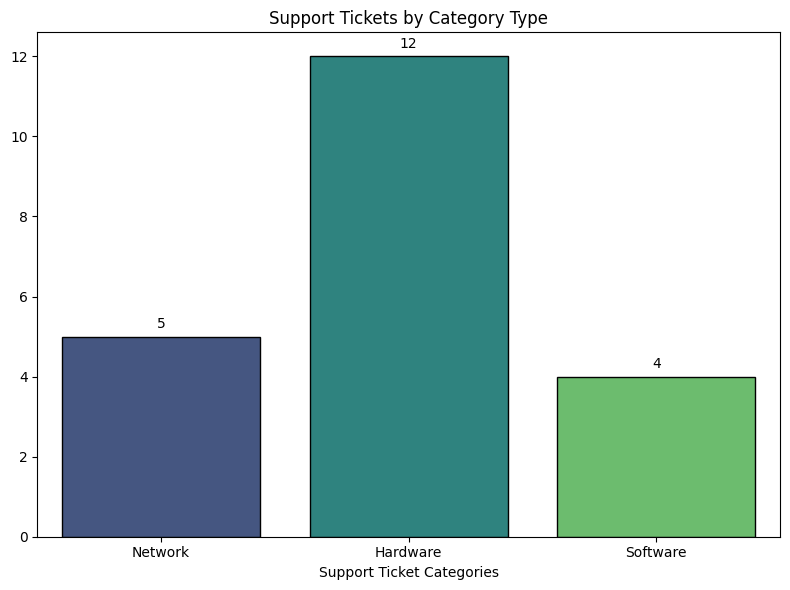

In [114]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Category', hue='Category', data=final_data, edgecolor="black",palette='viridis')

ax.set_title('Support Tickets by Category Type')  # Setting the plot title
ax.set_xlabel('Support Ticket Categories')  # Set the x-axis label
ax.set_ylabel('')  # Removing the y-axis label

# Add number totals above the bar for each class

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

#### Observations:

The model classified **5 tickets as network issues**, **11 tickets as hardware issues**, and **5 tickets as software issues**. Using our dataset, the **model tends to classify most tickets as hardware issues**.

In [115]:
# Display value counts for unique category values in 'Priority' column in 'final_data'

final_data["Priority"].value_counts()

Priority
High      18
Medium     3
Name: count, dtype: int64

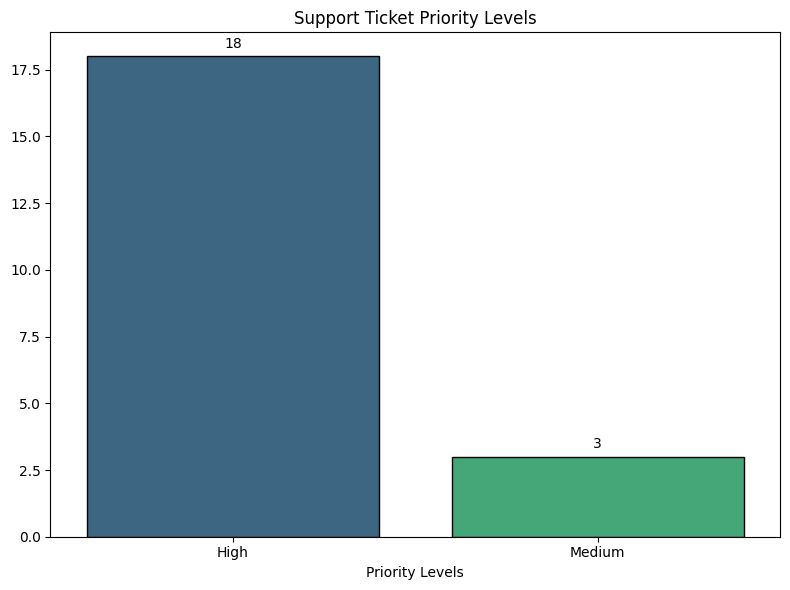

In [116]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Priority', hue='Priority', data=final_data, edgecolor="black",palette='viridis')

ax.set_title('Support Ticket Priority Levels')
ax.set_xlabel('Priority Levels')
ax.set_ylabel('')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

#### Observations:

The model classified **17 tickets as high priority** and **4 tickets as medium priority**. The model **did not classify any tickets as low priority**. Using our dataset, the **model tends to assign mostly high priority levels for most tickets**.

In [117]:
# Display value counts for unique category values in 'ETA' column in 'final_data'

final_data["ETA"].value_counts()

ETA
Immediate            14
24 Hours              4
2-3 Business Days     3
Name: count, dtype: int64

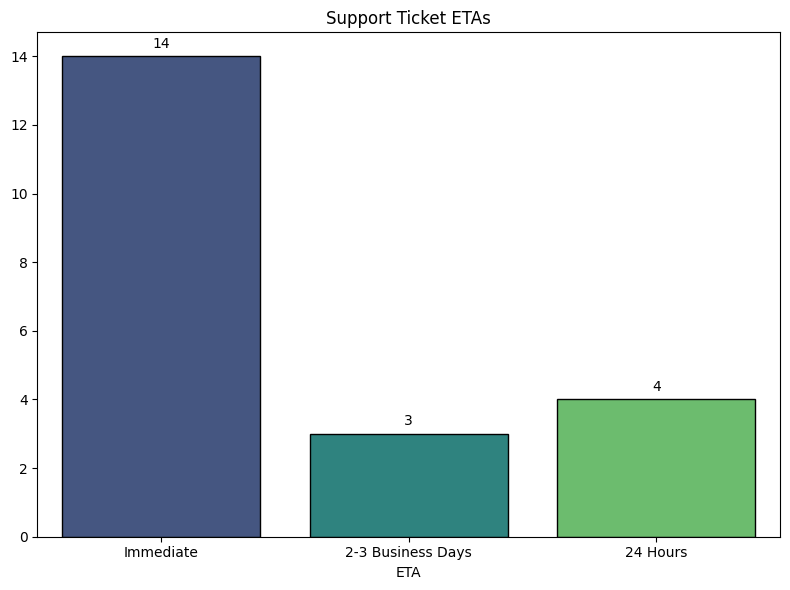

In [118]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='ETA', hue='ETA', data=final_data, edgecolor="black",palette='viridis')

ax.set_title('Support Ticket ETAs')
ax.set_xlabel('ETA')
ax.set_ylabel('')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

#### Observations:

The model assigned an **ETA of '24 Hours' to 7 tickets**, an **ETA of 'Immediate' to 13 tickets**, and an **ETA of '2-3 Business Days' to 1 ticket**. Using our dataset, the **model tends to assign extremely quick ETAs for most tickets**.

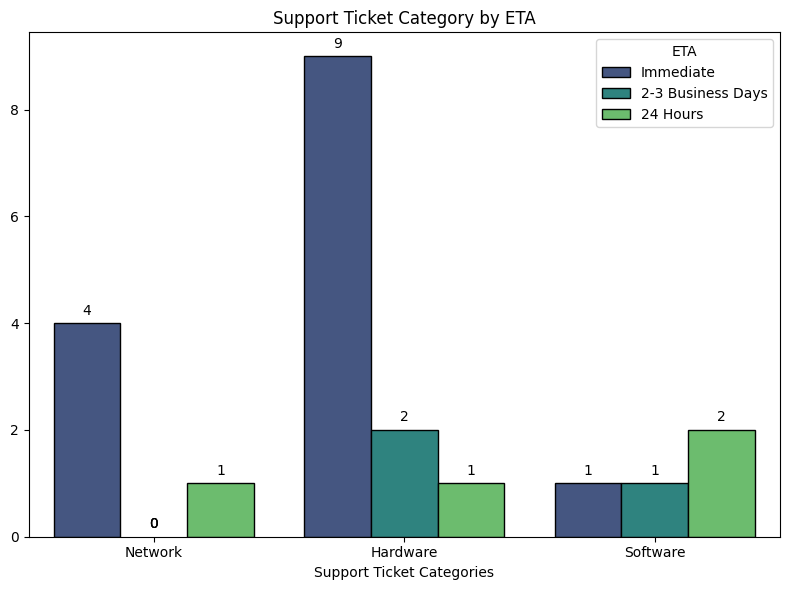

In [119]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Category', hue='ETA', data=final_data, edgecolor="black",palette='viridis')

ax.set_title('Support Ticket Category by ETA')
ax.set_xlabel('Support Ticket Categories')
ax.set_ylabel('')
ax.legend(title='ETA')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

#### Observations:

Here, **multivariate analysis illustrates that the model classifies a vast majority of tickets as having ETAs of 24 hours or less**.

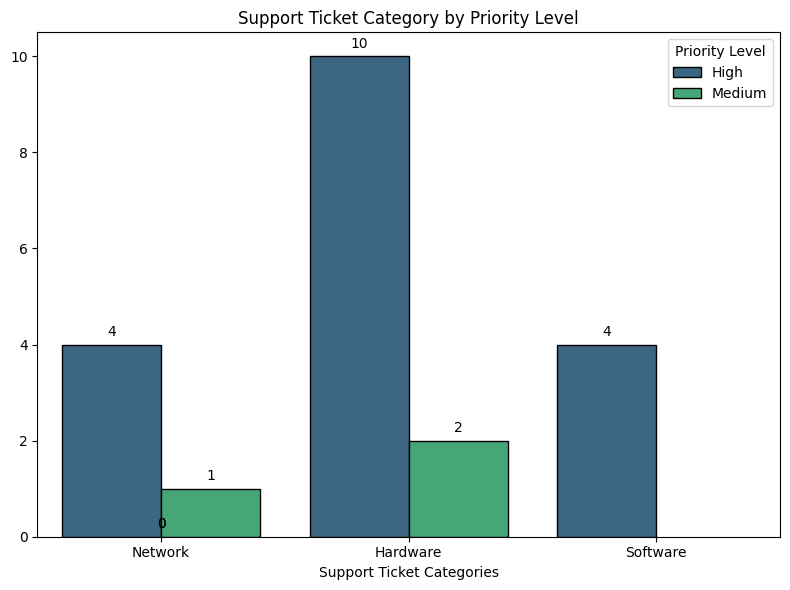

In [120]:
plt.figure(figsize=(8, 6))

ax = sns.countplot(x='Category', hue='Priority', data=final_data, edgecolor="black",palette='viridis')

ax.set_title('Support Ticket Category by Priority Level')
ax.set_xlabel('Support Ticket Categories')
ax.set_ylabel('')
ax.legend(title='Priority Level')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), 
                textcoords = 'offset points')

plt.tight_layout()
plt.show()

#### Observations:

Here, **multivariate analysis illustrates that the model classifies a vast majority of tickets as having high priority levels**.

## **Actionable Insights and Recommendations**

#### **Efficient Issue Categorization**

* **Streamlining the Support Process**: By categorizing issues, support teams can quickly identify the nature of the problem and route it to the appropriate team or specialist.
* **Resource Allocation**: Understanding the distribution of issues across categories helps in allocating resources more efficiently. For example, if most tickets are software-related, more software specialists can be assigned to handle these tickets.

#### **Relevant Tag Extraction**

* **Improving Searchability**: Tags make it easier to search and retrieve tickets based on specific keywords, improving the efficiency of support operations.
* **Trend Analysis**: Analyzing tags over time can reveal common issues or recurring problems, allowing the business to proactively address these issues.

#### **Priority Assignment**

* **Prioritizing Critical Issues**: High-priority tickets can be addressed more quickly, ensuring that critical problems are resolved promptly, thereby improving customer satisfaction.
* **Workload Management**: Understanding the priority of tickets helps in managing the workload of support teams, ensuring that urgent issues are not overlooked.

#### **Estimated Time for Resolution (ETA)**

* **Setting Customer Expectations**: Communicating ETAs to customers helps in setting realistic expectations about when their issue will be resolved.
* **Performance Monitoring**: Tracking the accuracy of ETAs against actual resolution times can provide insights into the efficiency of support processes and highlight areas for improvement.

#### **Draft Response Creation**

* **Consistency in Communication**: Ensures that customers receive consistent and high-quality responses.
* **Time-Saving**: Reduces the time support agents spend crafting responses, allowing them to focus on more complex issues.
* **Improved Customer Satisfaction**: Prompt and well-structured responses enhance the customer experience, leading to higher satisfaction rates.

#### **Insights Derived**

* **Common Issues and Trends**: By analyzing the categories and tags, the business can identify common issues faced by customers. This can inform product development and improvements.
* **Support Team Performance**: Tracking priorities and ETAs helps in assessing the performance of the support team and identifying areas for training and development.
* **Customer Feedback**: Responses generated by the model can be analyzed to understand customer concerns and feedback, providing valuable insights for improving products and services.
* **Operational Efficiency**: The streamlined process of categorizing, tagging, prioritizing, and responding to tickets enhances operational efficiency, reducing response times and improving resolution rates.